# TASK-1: Prediction using Supervised ML
# Name: Vivekanand Bhardwaj
## Problem: Predict the percentage score of an student based on the number of study hours




In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv('http://bit.ly/w-data')
#reading first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#calculating some quick statistics on the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#checking for the null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing the data

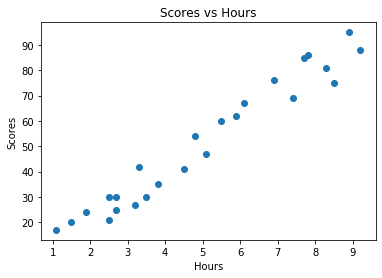

In [6]:
plt.scatter(x="Hours",y="Scores",data=df)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours')
plt.show()

(2, 0)

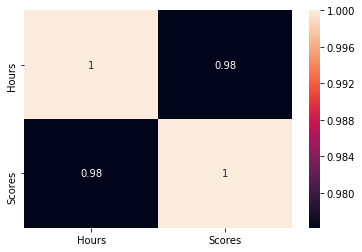

In [7]:
ax=sns.heatmap(df.corr(),annot=True)
ax.set_ylim(2,0)

### We can conclude from the heatmap that there is a strong correlation between the two and from scatterplot that the relationship is linear 

## Preparing the model

In [8]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [9]:
x=df[['Hours']]
y=df[['Scores']]

In [10]:
# splitting the data into two parts for model training and testing
# test data will be 20% of the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [11]:
model=LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#making prediction
y_predict=model.predict(x_test)

In [14]:
#intercept made on y axis
model.intercept_

array([3.680042])

In [15]:
#slope of the line
model.coef_

array([[9.59195136]])

In [16]:
#evaluating the model
mean_squared_error=metrics.mean_squared_error(y_test,y_predict)
root_mean_squared_error=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Mean squared error: {:.2f}'.format(mean_squared_error))
print('Root mean squared error: {:.2f}'.format(root_mean_squared_error))

Mean squared error: 24.33
Root mean squared error: 4.93


In [17]:
#score of the model
score=r2_score(y_test,y_predict)
print('r2_score: {:.2f}'.format(score))

r2_score: 0.98


In [18]:
#prediction of percentage score if an student study 9.25 hours
stdudent_score=model.predict([[9.25]])
stdudent_score=str(round(stdudent_score[0][0],2))
print('Student may get ' + stdudent_score +'% marks if S/He study for 9.25 hours')

Student may get 92.41% marks if S/He study for 9.25 hours


### Hence from the above model we can predict the percentage marks of the student with an r2_score of 0.98